#### <center>Data Processing and Analysis in Python</center>
## <center>GROUP 17: Data-driven Healers</center>
# **<center>Healthcare Unmasked by Medilytics</center>**


<center><img src="https://i0.wp.com/timoelliott.com/blog/wp-content/uploads/2014/01/predictive-maintenance-health_thumb-1.jpg?w=640&ssl=1" /></center>


### **Project Overview**
**Background:**<br>Hospitals and the healthcare industry are pivotal in any society, providing essential services like critical care, diagnostic services, and life-saving treatments. With the vast and intricate nature of healthcare data, our project, 'Healthcare Unmasked by Medilytics', aims to delve deep into the dataset of de-identified Inpatient Discharges from various New York Hospitals.

**Objective:** <br>The primary goal is to perform comprehensive analyses of patient data, diseases and their procedures, and the financial aspects of the healthcare industry in New York. This project seeks to uncover insights into the dynamics of New York's healthcare system, which caters to a diverse and ever-growing population.

**Significance:** <br>Understanding these dynamics is vital for effective healthcare planning. It provides invaluable information to policymakers, healthcare administrators, and researchers, assisting them in making informed decisions and shaping future healthcare strategies.


### **Research Questions**
1. **Demographic Influence on Disease and Treatment**: How do population demographics affect disease contraction and the choice of treatment? We will analyze variables such as age, gender and ethnicity to uncover patterns.
2. **Temporal Shifts in Disease Vulnerability**: How has the susceptibility of different demographic groups to certain diseases changed over time? This involves a longitudinal analysis of disease incidence across various demographics.
3. **Evolution of Treatment Methods**: How have the treatments administered for certain diseases evolved through the years? We will track changes in medical procedures and correlate them with advancements in medical technology and guidelines.
4. **Predicting Hospital Discharge Charges**: Can we develop a model to predict discharge charges more accurately, thereby reducing the gap between estimated and actual charges? This involves analyzing financial data related to patient care and hospital charges.


### **Milestones and progress**
The milestones with a  ✔ have been achieved.


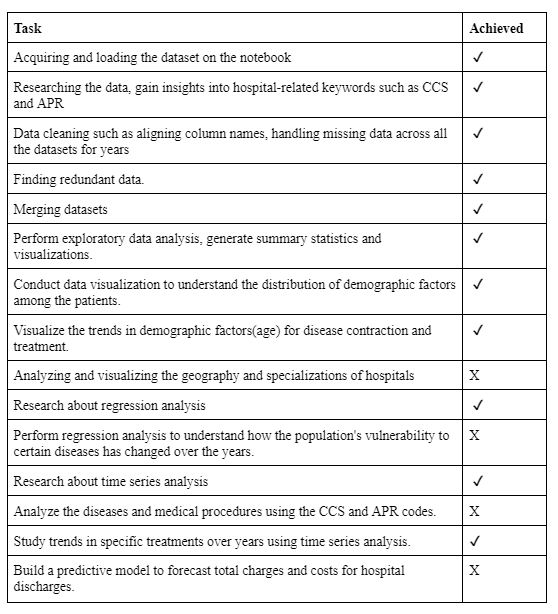

#### Reason for delay in fulfilling the objective
One of the primary reasons why there was a delay was because of the underestimation of time required for data acquisition and data cleaning by the team. This affected the data analysis part of the project such as building the predictive model, performing regression analysis, and analyzing the geography, specialization of hospitals and diseases, and medical procedure.


#### To catchup
Since, we have reduced the number of research questions, we plan to effectively divide tasks between the team to fulfill the future activities in a much efficient way. Some of the resources we will need to accompish the next steps might be a computer higher RAM which one of the team mate has. So, we plan to sample the data from the already sampled data and run our functions and models on that then later on, we plan to run the same codes on the entire dataset in the computer with higher RAM.

We are still unclear as to how we will implement the predictive model and perform the regression analysis. We plan to resolve this by learning about these methods online and then working in groups to figure out task at a time.

### **Importing the Libraries**

The notebook begins by importing necessary libraries such as pandas, which is crucial for data manipulation in Python. Additionally, it mounts a Google Drive folder, indicating that the data is being stored and accessed from Google Drive.

In [1]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing the library required for the project
import numpy as np
import pandas as pd
# from google.colab import drive
# drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz

C:\ProgramData\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### **Importing the Data** <strong><font color= 'red'>(DO NOT RUN!)</font></strong>
The data for this project comes from the "Hospital Inpatient Discharges (SPARCS De-Identified) Dataset" provided by the New York State Department of Health, which contains a rich and anonymized repository of healthcare information capturing the landscape of inpatient care in the state of New York. The dataset was downloaded as a CSV file from the website for the years 2009 to 2021. Following the reading of the files, we sampled the data to 500K observations for each year and saved the sampled data as 'discharge_year>.csv'. We reduced the dataset from 23 million to 6.5 million observations by sampling (=13*5,00,000).

In [ ]:
# Saving the csv file paths in the list named data
data = ["/content/gdrive/Shareddrives/medical_data/2009_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2010_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2011_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2012_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2013_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2014_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2015_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2016_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2017_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2018_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2019_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv", "/content/gdrive/Shareddrives/medical_data/2020_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv",
        "/content/gdrive/Shareddrives/medical_data/2021_Hospital_Inpatient_Discharges_SPARCS_De-Identified.csv"]

**Reading and Sampling Data:** <br>The notebook includes a loop for reading multiple CSV files from the specified directory on Google Drive. For each file, it samples 500,000 rows and saves them to a new file. This suggests a process of data reduction to manage large datasets.


In [ ]:
path = "/content/gdrive/Shareddrives/medical_data/"
for d in range(0,len(data)):
  # Reading the csv file
  df_temp = pd.read_csv(data[d])
  # Sampling each year's data into 500k observations
  df_temp = df_temp.sample(n=500000)
  # Saving the sampled data into new csv file
  df_temp.to_csv(path+'discharge_'+str(2009+d)+".csv")
# Deleting the temporary data
del df_temp

### **Data Cleaning** (RUN AFTER THESE BLOCKS)
1. Checking the column names across all dataframes and standardizing column names across all dataframes to ensure consistency and facilitate further analysis.
2. Merge all the years dataframes into one dataframe.
3. Handle null values in the merged dataframe.


In [3]:
# Set the maximum number of columns displayed
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [4]:
# reading the CSV file of all the years and saving it into different dataframes

discharge_2009_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2009.csv")
discharge_2010_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2010.csv")
discharge_2011_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2011.csv")
discharge_2012_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2012.csv")
discharge_2013_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2013.csv")
discharge_2014_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2014.csv")
discharge_2015_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2015.csv")
discharge_2016_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2016.csv")
discharge_2017_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2017.csv")
discharge_2018_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2018.csv")
discharge_2019_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2019.csv")
discharge_2020_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2020.csv")
discharge_2021_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2021.csv")

C:\Users\vinee\AppData\Local\Temp\ipykernel_24508\2501273373.py:11: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  discharge_2017_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2017.csv")
C:\Users\vinee\AppData\Local\Temp\ipykernel_24508\2501273373.py:14: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  discharge_2020_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2020.csv")
C:\Users\vinee\AppData\Local\Temp\ipykernel_24508\2501273373.py:15: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  discharge_2021_df = pd.read_csv(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/samples/discharge_2021.csv")


In [5]:
# displaying the columns of the dataframe of 2021 year to check the column names
discharge_2021_df.columns

Index(['Unnamed: 0', 'Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [6]:
# displaying the first five observations of teh 2021 discharge patients data
discharge_2021_df.head()

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,1593744,Central NY,Oneida,3202003.0,599.0,Faxton-St Lukes Healthcare St Lukes Division,0 to 17,134,M,White,Not Span/Hispanic,9,Urgent,Home or Self Care,2021,PNL014,NEONATAL ABSTINENCE SYNDROME,NaN,NaN,639,NEONATE BIRTH WEIGHT > 2499 GRAMS WITH OTHER S...,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Self-Pay,NaN,NaN,2600.0,N,25497.06,10977.17
1,2023395,Capital/Adirond,Schenectady,4601001.0,829.0,Ellis Hospital,30 to 49,120,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2021,END009,OBESITY,GIS010,GASTRECTOMY,403,PROCEDURES FOR OBESITY,10,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...",2,Moderate,Minor,Surgical,Medicaid,Medicaid,NaN,NaN,N,59975.53,15432.00
2,1908836,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,30 to 49,115,F,White,Not Span/Hispanic,7,Emergency,Home or Self Care,2021,PRG018,MATERNAL CARE RELATED TO DISORDERS OF THE PLAC...,PGN001,FETAL HEART RATE MONITORING,566,ANTEPARTUM WITHOUT O.R. PROCEDURE,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",3,Major,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,88124.58,26153.47
3,562185,New York City,Manhattan,7002001.0,1438.0,Bellevue Hospital Center,30 to 49,113,F,Other Race,Spanish/Hispanic,3,Emergency,Home or Self Care,2021,DIG024,POSTPROCEDURAL OR POSTOPERATIVE DIGESTIVE SYST...,GIS004,GI SYSTEM ENDOSCOPY WITHOUT BIOPSY (DIAGNOSTIC),810,HEMORRHAGE OR HEMATOMA DUE TO COMPLICATION,21,"INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS",2,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,29932.95,17213.96
4,1877552,Finger Lakes,Livingston,2527000.0,393.0,Nicholas H. Noyes Memorial Hospital,50 to 69,144,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2021,INF012,CORONAVIRUS DISEASE 2019 (COVID-19),ADM019,POTENTIAL COVID-19 THERAPIES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Major,Medical,Medicare,Medicaid,Private Health Insurance,NaN,Y,14490.68,3085.72


In [7]:
# saving all the dataframe names as a list in a variable
dataframes = [discharge_2009_df,discharge_2010_df,discharge_2011_df,discharge_2012_df,discharge_2013_df,discharge_2014_df,discharge_2015_df,discharge_2016_df,discharge_2017_df,discharge_2018_df,discharge_2019_df,discharge_2020_df,discharge_2021_df]

# displaying the shape of the dataframes of each year
for i in range(len(dataframes)):
  print(dataframes[i].shape, 2009+i)

(500000, 35) 2009
(500000, 35) 2010
(500000, 35) 2011
(500000, 35) 2012
(500000, 35) 2013
(500000, 35) 2014
(500000, 35) 2015
(500000, 35) 2016
(500000, 35) 2017
(500000, 34) 2018
(500000, 34) 2019
(500000, 34) 2020
(500000, 34) 2021


After looking at the shape of the dataframe, we observed that the data of year 2018 to 2021 has one column lesser than the data from the other years. So, we wanted to figure out which columns are missing or not matching with other dataframes.

In [8]:
# displaying the columns which are mismatching with the other dataframes
for i in range(0,len(dataframes)-1):
  print('\n')
  print(2009+i)
  for j in dataframes[i].columns:
    if j not in dataframes[-1].columns:
      print(j)



2009
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Source of Payment 1
Source of Payment 2
Source of Payment 3
Abortion Edit Indicator


2010
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Source of Payment 1
Source of Payment 2
Source of Payment 3
Abortion Edit Indicator


2011
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Abortion Edit Indicator


2012
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Abortion Edit Indicator


2013
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
Abortion Edit Indicator


2014
Health Service Area
Facility ID
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedur

In [9]:
# fixes dataframe from 2009 - 2017 columns to match 2021
for i in range(0,len(dataframes)-4):
  # change Facility Id/ID to Permanent Facility Id
  if 2009 + i in [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    dataframes[i] = dataframes[i].rename(columns={'Facility Id': 'Permanent Facility Id'})
    dataframes[i] = dataframes[i].rename(columns={'Facility ID': 'Permanent Facility Id'})
    dataframes[i] = dataframes[i].rename(columns={'Health Service Area': 'Hospital Service Area'})
  # change Source of Payment # to Payment Typology #
  if 2009 + i in [2009, 2010]:
    dataframes[i] = dataframes[i].rename(columns={'Source of Payment 1': 'Payment Typology 1',
                                                  'Source of Payment 2': 'Payment Typology 2',
                                                  'Source of Payment 3': 'Payment Typology 3'})
  # dropping the 'Abortion Edit Indicator' column as it is not available in the later years dataset
  dataframes[i] = dataframes[i].drop('Abortion Edit Indicator', axis=1)

  # renaming the CCS code and description column names to one name
  dataframes[i] = dataframes[i].rename(columns={'CCS Diagnosis Code': 'CCSR Diagnosis Code',
                                    'CCS Diagnosis Description': 'CCSR Diagnosis Description',
                                    'CCS Procedure Code': 'CCSR Procedure Code',
                                    'CCS Procedure Description': 'CCSR Procedure Description'})

In [10]:
# concatenating the dataframes of all years into one dataframe
df_2009to2021 = pd.concat(dataframes)

# concatenating the discharge patients data from the year 2018 to 2021
df_2018to2021 = pd.concat([discharge_2018_df,discharge_2019_df,discharge_2020_df,discharge_2021_df])

# deleting the dataframes to free up storage
for i in dataframes:
  del i

In [11]:
# Count the number of null values in each column
df_2009to2021.isnull().sum().sum()

10880659

On analyzing the null values in the dataset, we came to the following conclusion:
1. Changes in hospital locations, the opening of new hospitals, or incomplete reporting may result in missing data about service areas and counties.
2. There are also null values in the payment typology options (2 and 3) because most people pay using one payment method while very few people use multiple payment methods to pay the entire amount.
3. There are a higher number of null values in 'Birth Weight' because not all patients in the hospital were there for pregnancy delivery.
4. There may have been changes in the way zip codes are recorded or reported over time. Missing digits could be the result of changing data collection practices or reporting standards.
5. Changes in how patient outcomes are recorded or reported, variations in hospital discharge procedures, or updates to patient privacy regulations may all contribute to the absence of disposition information.
6. Changes in healthcare coding systems, severity assessment criteria updates, or reporting standards differences could result in missing data in these columns.


In [12]:
# storing the number of null values in each facility
facility_null_counts = df_2009to2021.groupby('Facility Name').apply(lambda x: len(x[x.isna().any(axis=1)]))

# displaying the top 10 facilities with maximum number of null values
print(facility_null_counts.sort_values(ascending=False).head(10))

Facility Name
North Shore University Hospital           133865
Mount Sinai Hospital                       96575
Strong Memorial Hospital                   90211
Maimonides Medical Center                  87754
Lenox Hill Hospital                        84767
Staten Island University Hosp-North        84234
Albany Medical Center Hospital             79327
Rochester General Hospital                 76423
Long Island Jewish Medical Center          75262
Good Samaritan Hospital Medical Center     71471
dtype: int64


After carefully investigating the data, we realized that there are many facilities which have more than 70K of NaN values in its information of discharged patients. Hence, we conclude that these facilities are not storing the data properly.

In [13]:
df_2009to2021['Hospital Service Area'].unique()

array(['Long Island', 'New York City', 'Capital/Adiron', 'Hudson Valley',
       'Finger Lakes', 'Southern Tier', 'Western NY', 'Central NY', nan,
       'Capital/Adirond'], dtype=object)

In [14]:
# Count the instances for Capital/Adiron and Capital/Adirond
(df_2009to2021['Hospital Service Area'] == 'Capital/Adiron').sum()

101944

In [15]:
(df_2009to2021['Hospital Service Area'] == 'Capital/Adirond').sum()

345179

In [16]:
# Drop Abortion data
df_2009to2021.drop(df_2009to2021[df_2009to2021['Facility Name'] == 'Abortion Record - Facility Name Redacted'].index,inplace=True)

In [17]:
# Convert 'CCSR Diagnosis Description' values to title case
df_2009to2021['CCSR Diagnosis Description'] = df_2009to2021['CCSR Diagnosis Description'].map(lambda x: x.title() if isinstance(x, str) else x)

In [156]:
# Convert 'APR DRG Description' values to title case
df_2009to2021['APR DRG Description'] = df_2009to2021['APR DRG Description'].map(lambda x: x.lower() if isinstance(x, str) else x)

In [157]:
df_2009to2021["APR MDC Description"] = df_2009to2021["APR MDC Description"].str.lower()

In [19]:
# Check unique values of 'Emergency Department Indicator' column
df_2009to2021['Emergency Department Indicator'].value_counts()

Emergency Department Indicator
Y        3200395
N        2268629
True      589354
False     405014
Name: count, dtype: int64

In [20]:
# Converting True to Y and False to N
df_2009to2021['Emergency Department Indicator'] = df_2009to2021['Emergency Department Indicator'].replace({True: 'Y', False: 'N'})

In [21]:
df_2009to2021['Emergency Department Indicator'].value_counts()

Emergency Department Indicator
Y    3789749
N    2673643
Name: count, dtype: int64

In [22]:
# Convert 'APR MDC Description' values to title case
df_2009to2021['APR MDC Description'] = df_2009to2021['APR MDC Description'].map(lambda x: x.title() if isinstance(x, str) else x)

In [23]:
df_2009to2021.head()

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,1095721,Long Island,Suffolk,5149000.0,895.0,John T Mather Memorial Hospital of Port Jeffer...,70 or Older,117,F,White,Not Span/Hispanic,22,Emergency,Home w/ Home Health Services,2009,135.0,Intestinal Infection,54.0,OT VASC CATH; NOT HEART,248.0,Major Gastrointestinal & Peritoneal Infections,6.0,Diseases And Disorders Of The Digestive System,3.0,Major,Moderate,Medical,Self-Pay,Self-Pay,NaN,0,Y,88254.96,23455.91
1,1420146,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center - North Division,50 to 69,104,M,Other Race,Spanish/Hispanic,3,Elective,Skilled Nursing Home,2009,203.0,Osteoarthritis,152.0,ARTHROPLASTY KNEE,302.0,Knee Joint Replacement,8.0,Diseases And Disorders Of The Musculoskeletal ...,1.0,Minor,Minor,Surgical,Other Non-Federal Program,Self-Pay,NaN,0,N,58971.20,20662.83
2,545399,Long Island,Nassau,2908000.0,511.0,Winthrop-University Hospital,70 or Older,115,M,Black/African American,Not Span/Hispanic,10,Emergency,Skilled Nursing Home,2009,157.0,Acute Renal Failure,216.0,RESP INTUB/MECH VENTIL,460.0,Renal Failure,11.0,Diseases And Disorders Of The Kidney And Urina...,3.0,Major,Extreme,Medical,Insurance Company,Medicare,NaN,0,Y,104918.64,21311.57
3,1945839,New York City,Manhattan,7002053.0,1446.0,NYU Hospital for Joint Diseases,30 to 49,117,F,White,Not Span/Hispanic,8,Elective,Home w/ Home Health Services,2009,205.0,Back Problem,158.0,SPINAL FUSION,304.0,Dorsal & Lumbar Fusion Proc Except For Curvatu...,8.0,Diseases And Disorders Of The Musculoskeletal ...,1.0,Minor,Minor,Surgical,Blue Cross,Self-Pay,NaN,0,N,58051.09,20167.79
4,2402619,New York City,Queens,7003006.0,1632.0,Peninsula Hospital Center,18 to 29,116,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2009,128.0,Asthma,0.0,NO PROC,141.0,Asthma,4.0,Diseases And Disorders Of The Respiratory System,1.0,Minor,Minor,Medical,Self-Pay,NaN,NaN,0,Y,13619.20,4277.98


In [110]:
# importing the required csv files for CCSR conversion files
ccsr_new_to_icd10pcs_procedure = pd.read_excel(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/CCSR_Conversion_Files/PRCCSR-Reference-File-v2023-1.xlsx", sheet_name='PR_to_CCSR_Mapping', header=1)
ccsr_new_to_icd10pcs_disease = pd.read_excel(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/CCSR_Conversion_Files/DXCCSR-Reference-File-v2023-1.xlsx", sheet_name='DX_to_CCSR_Mapping', header=1)

icd10pcs_to_icd9cm_procedure = pd.read_excel(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/CCSR_Conversion_Files/icd10pcs_to_icd9cm_procedure.xlsx")
icd10cm_to_icd9cm_disease = pd.read_excel(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/CCSR_Conversion_Files/icd10cm_to_icd9cm_disease.xlsx")

icd9cm_to_ccsr_old_procedure = pd.read_excel(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/CCSR_Conversion_Files/icd9cm_to_ccsr_old_procedure.xlsx")
icd9cm_to_ccsr_old_disease = pd.read_excel(r"C:\Users\vinee\OneDrive\Documents/courses/Python project/CCSR_Conversion_Files/icd9cm_to_ccsr_old_disease.xlsx", header=1)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [111]:
# new ccsr codes to the ICD-10-PCS code conversion file for procedures
ccsr_new_to_icd10pcs_procedure.head()

,ICD-10-PCS Code,ICD-10-PCS Code Description,CCSR Category,CCSR Category Description
0,30230AZ,Transfusion of Embryonic Stem Cells into Perip...,ADM011,"Administration and transfusion of bone marrow,..."
1,30230C0,Transfusion of Autologous Hematopoietic Stem/P...,ADM011,"Administration and transfusion of bone marrow,..."
2,30230G0,Transfusion of Autologous Bone Marrow into Per...,ADM011,"Administration and transfusion of bone marrow,..."
3,30230G1,Transfusion of Nonautologous Bone Marrow into ...,ADM011,"Administration and transfusion of bone marrow,..."
4,30230G2,Transfusion of Allogeneic Related Bone Marrow ...,ADM011,"Administration and transfusion of bone marrow,..."


In [112]:
# new ccsr codes to the ICD-10-PCS code conversion file for diseases
ccsr_new_to_icd10pcs_disease.head()

,ICD-10-CM Code,ICD-10-CM Code Description,CCSR Category,CCSR Category Description,Inpatient Default CCSR (Y/N/X),Outpatient Default CCSR (Y/N/X)
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",DIG001,Intestinal infection,Y,Y
1,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",INF003,Bacterial infections,N,N
2,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",DIG001,Intestinal infection,Y,Y
3,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",INF003,Bacterial infections,N,N
4,A009,"Cholera, unspecified",DIG001,Intestinal infection,Y,Y


In [113]:
# ICD-10-PCS code to ICD-9-CM code conversion file for procedure
icd10pcs_to_icd9cm_procedure.head()

,icd10cm,icd9cm,flags,approximate,no_map,combination,scenario,choice_list
0,16070,231,10000,1,0,0,0,0
1,16071,231,10000,1,0,0,0,0
2,16072,232,10000,1,0,0,0,0
3,16073,232,10000,1,0,0,0,0
4,16074,233,10000,1,0,0,0,0


In [114]:
# ICD-10-PCS code to ICD-9-CM code conversion file for disease
icd10cm_to_icd9cm_disease.head()

,icd10cm,icd9cm,flags,approximate,no_map,combination,scenario,choice_list
0,A000,10,0,0,0,0,0,0
1,A001,11,0,0,0,0,0,0
2,A009,19,0,0,0,0,0,0
3,A0100,20,10000,1,0,0,0,0
4,A0101,20,10000,1,0,0,0,0


In [115]:
# ICD-9-CM to old CCSR code conversion file for procedure
icd9cm_to_ccsr_old_procedure.head()

,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION'
0,' ','0 ','No PROC ',INVALID CODES IN USER DATA
1,'0101 ','1 ','Inc/exc CNS ',CISTERNAL PUNCTURE
2,'0109 ','1 ','Inc/exc CNS ',CRANIAL PUNCTURE NEC
3,'0121 ','1 ','Inc/exc CNS ',CRANIAL SINUS I & D
4,'0122 ','1 ','Inc/exc CNS ',REMOV INTRACRAN STIMULAT


In [116]:
# ICD-9-CM to old CCSR code conversion file for disease
icd9cm_to_ccsr_old_disease.head()

,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION','OPTIONAL CCS CATEGORY','OPTIONAL CCS CATEGORY DESCRIPTION'
0,' ','0 ','No DX',INVALID CODES IN USER DATA,' ',' '
1,'01000','1 ','Tuberculosis',PRIM TB COMPLEX-UNSPEC,' ',' '
2,'01001','1 ','Tuberculosis',PRIM TB COMPLEX-NO EXAM,' ',' '
3,'01002','1 ','Tuberculosis',PRIM TB COMPLEX-EXM UNKN,' ',' '
4,'01003','1 ','Tuberculosis',PRIM TB COMPLEX-MICRO DX,' ',' '


In [117]:
# cleaning the ICD-9-CM to old CCSR file to remove the inverted commas from the data
icd9cm_to_ccsr_old_procedure["'ICD-9-CM CODE'"].replace('\s', '', regex=True, inplace=True)
icd9cm_to_ccsr_old_procedure["'CCS CATEGORY'"].replace('\s', '', regex=True, inplace=True)

icd9cm_to_ccsr_old_procedure.head()

,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION'
0,'','0','No PROC ',INVALID CODES IN USER DATA
1,'0101','1','Inc/exc CNS ',CISTERNAL PUNCTURE
2,'0109','1','Inc/exc CNS ',CRANIAL PUNCTURE NEC
3,'0121','1','Inc/exc CNS ',CRANIAL SINUS I & D
4,'0122','1','Inc/exc CNS ',REMOV INTRACRAN STIMULAT


In [118]:
# cleaning the ICD-9-CM to old CCSR file to remove the inverted commas from the data
icd9cm_to_ccsr_old_disease["'ICD-9-CM CODE'"].replace('\s','', regex=True, inplace=True)
icd9cm_to_ccsr_old_disease["'CCS CATEGORY'"].replace('\s','', regex=True, inplace=True)

icd9cm_to_ccsr_old_disease.head()

,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION','OPTIONAL CCS CATEGORY','OPTIONAL CCS CATEGORY DESCRIPTION'
0,'','0','No DX',INVALID CODES IN USER DATA,' ',' '
1,'01000','1','Tuberculosis',PRIM TB COMPLEX-UNSPEC,' ',' '
2,'01001','1','Tuberculosis',PRIM TB COMPLEX-NO EXAM,' ',' '
3,'01002','1','Tuberculosis',PRIM TB COMPLEX-EXM UNKN,' ',' '
4,'01003','1','Tuberculosis',PRIM TB COMPLEX-MICRO DX,' ',' '


In [119]:
# removing the inverted commas from the data
icd9cm_to_ccsr_old_procedure["'ICD-9-CM CODE'"] = icd9cm_to_ccsr_old_procedure["'ICD-9-CM CODE'"].str.extract('\'(?P<code>\d{4})\'', expand=False)
icd9cm_to_ccsr_old_procedure["'CCS CATEGORY'"] = icd9cm_to_ccsr_old_procedure["'CCS CATEGORY'"].str.extract('\'(?P<code>\d{1,})\'', expand=False)

In [120]:
icd9cm_to_ccsr_old_procedure

,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION'
0,NaN,0,'No PROC ',INVALID CODES IN USER DATA
1,0101,1,'Inc/exc CNS ',CISTERNAL PUNCTURE
2,0109,1,'Inc/exc CNS ',CRANIAL PUNCTURE NEC
3,0121,1,'Inc/exc CNS ',CRANIAL SINUS I & D
4,0122,1,'Inc/exc CNS ',REMOV INTRACRAN STIMULAT
...,...,...,...,...
3944,9988,231,'Ot Rx procs ',THERAPEUTC PHOTOPHERESIS (Begin 1988)
3945,9991,231,'Ot Rx procs ',ANESTHESIA ACUPUNCTURE
3946,9992,231,'Ot Rx procs ',OTHER ACUPUNCTURE
3947,9998,231,'Ot Rx procs ',MILK EXTRACTION


In [121]:
icd9cm_to_ccsr_old_disease["'ICD-9-CM CODE'"] = icd9cm_to_ccsr_old_disease["'ICD-9-CM CODE'"].str.extract('\'(?P<code>\d{5})\'', expand=False)
icd9cm_to_ccsr_old_disease["'CCS CATEGORY'"] = icd9cm_to_ccsr_old_disease["'CCS CATEGORY'"].str.extract('\'(?P<code>\d{1,})\'', expand=False)

In [122]:
icd9cm_to_ccsr_old_disease.head()

,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION','OPTIONAL CCS CATEGORY','OPTIONAL CCS CATEGORY DESCRIPTION'
0,NaN,0,'No DX',INVALID CODES IN USER DATA,' ',' '
1,01000,1,'Tuberculosis',PRIM TB COMPLEX-UNSPEC,' ',' '
2,01001,1,'Tuberculosis',PRIM TB COMPLEX-NO EXAM,' ',' '
3,01002,1,'Tuberculosis',PRIM TB COMPLEX-EXM UNKN,' ',' '
4,01003,1,'Tuberculosis',PRIM TB COMPLEX-MICRO DX,' ',' '


In [123]:
# converting the data type of the column into string to remove any idiosyncracies
icd10pcs_to_icd9cm_procedure['icd10cm'] = icd10pcs_to_icd9cm_procedure['icd10cm'].astype(str)

In [124]:
icd10cm_to_icd9cm_disease['icd10cm'] = icd10cm_to_icd9cm_disease['icd10cm'].astype(str)

In [125]:
icd9cm_to_ccsr_old_procedure.columns = icd9cm_to_ccsr_old_procedure.columns.str.replace("'","")

In [126]:
icd9cm_to_ccsr_old_procedure.head()

,ICD-9-CM CODE,CCS CATEGORY,CCS CATEGORY DESCRIPTION,ICD-9-CM CODE DESCRIPTION
0,NaN,0,'No PROC ',INVALID CODES IN USER DATA
1,0101,1,'Inc/exc CNS ',CISTERNAL PUNCTURE
2,0109,1,'Inc/exc CNS ',CRANIAL PUNCTURE NEC
3,0121,1,'Inc/exc CNS ',CRANIAL SINUS I & D
4,0122,1,'Inc/exc CNS ',REMOV INTRACRAN STIMULAT


In [127]:
icd9cm_to_ccsr_old_disease.columns = icd9cm_to_ccsr_old_disease.columns.str.replace("'","")
icd9cm_to_ccsr_old_disease.head()

,ICD-9-CM CODE,CCS CATEGORY,CCS CATEGORY DESCRIPTION,ICD-9-CM CODE DESCRIPTION,OPTIONAL CCS CATEGORY,OPTIONAL CCS CATEGORY DESCRIPTION
0,NaN,0,'No DX',INVALID CODES IN USER DATA,' ',' '
1,01000,1,'Tuberculosis',PRIM TB COMPLEX-UNSPEC,' ',' '
2,01001,1,'Tuberculosis',PRIM TB COMPLEX-NO EXAM,' ',' '
3,01002,1,'Tuberculosis',PRIM TB COMPLEX-EXM UNKN,' ',' '
4,01003,1,'Tuberculosis',PRIM TB COMPLEX-MICRO DX,' ',' '


In [128]:
icd9cm_to_ccsr_old_procedure['ICD-9-CM CODE'] = icd9cm_to_ccsr_old_procedure['ICD-9-CM CODE'].fillna(0).astype(int)
icd9cm_to_ccsr_old_procedure['CCS CATEGORY'] = icd9cm_to_ccsr_old_procedure['CCS CATEGORY'].astype(int)

In [131]:
icd9cm_to_ccsr_old_disease['ICD-9-CM CODE'] = icd9cm_to_ccsr_old_disease['ICD-9-CM CODE'].fillna(0).astype(int)
icd9cm_to_ccsr_old_disease['CCS CATEGORY'] = icd9cm_to_ccsr_old_disease['CCS CATEGORY'].astype(int)

In [132]:
# creating a new dataframe to store all the mapping of codes
ccsr_procedure_mapped = ccsr_new_to_icd10pcs_procedure[['CCSR Category', 'ICD-10-PCS Code']]
ccsr_procedure_mapped.head()

,CCSR Category,ICD-10-PCS Code
0,ADM011,30230AZ
1,ADM011,30230C0
2,ADM011,30230G0
3,ADM011,30230G1
4,ADM011,30230G2


In [133]:
# creating a new dataframe to store all the mapping of codes
ccsr_disease_mapped = ccsr_new_to_icd10pcs_disease[['CCSR Category', 'ICD-10-CM Code']]
ccsr_disease_mapped.head()

,CCSR Category,ICD-10-CM Code
0,DIG001,A000
1,INF003,A000
2,DIG001,A001
3,INF003,A001
4,DIG001,A009


In [134]:
ccsr_procedure_mapped = ccsr_procedure_mapped.merge(icd10pcs_to_icd9cm_procedure, how='inner', left_on='ICD-10-PCS Code', right_on='icd10cm')
ccsr_procedure_mapped

,CCSR Category,ICD-10-PCS Code,icd10cm,icd9cm,flags,approximate,no_map,combination,scenario,choice_list
0,ADM011,30230AZ,30230AZ,4104,10000,1,0,0,0,0
1,ADM011,30230G0,30230G0,4101,10000,1,0,0,0,0
2,ADM011,30230G1,30230G1,91,10112,1,0,1,1,2
3,ADM011,30230G1,30230G1,92,10112,1,0,1,1,2
4,ADM011,30230G1,30230G1,93,10112,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
82354,URN011,0TY10Z1,0TY10Z1,93,10112,1,0,1,1,2
82355,URN011,0TY10Z1,0TY10Z1,5569,10111,1,0,1,1,1
82356,URN011,0TY10Z2,0TY10Z2,92,10112,1,0,1,1,2
82357,URN011,0TY10Z2,0TY10Z2,93,10112,1,0,1,1,2


In [135]:
ccsr_disease_mapped = ccsr_disease_mapped.merge(icd10cm_to_icd9cm_disease, how='inner', left_on='ICD-10-CM Code', right_on='icd10cm')
ccsr_disease_mapped

,CCSR Category,ICD-10-CM Code,icd10cm,icd9cm,flags,approximate,no_map,combination,scenario,choice_list
0,DIG001,A000,A000,10,0,0,0,0,0,0
1,INF003,A000,A000,10,0,0,0,0,0,0
2,DIG001,A001,A001,11,0,0,0,0,0,0
3,INF003,A001,A001,11,0,0,0,0,0,0
4,DIG001,A009,A009,19,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
94299,FAC025,Z992,Z992,V4511,0,0,0,0,0,0
94300,FAC025,Z993,Z993,V463,0,0,0,0,0,0
94301,FAC025,Z9981,Z9981,V462,0,0,0,0,0,0
94302,FAC025,Z9989,Z9989,V468,10000,1,0,0,0,0


In [136]:
ccsr_procedure_mapped = ccsr_procedure_mapped.merge(icd9cm_to_ccsr_old_procedure, how='inner', left_on='icd9cm', right_on='ICD-9-CM CODE')
ccsr_procedure_mapped

,CCSR Category,ICD-10-PCS Code,icd10cm,icd9cm,flags,approximate,no_map,combination,scenario,choice_list,ICD-9-CM CODE,CCS CATEGORY,CCS CATEGORY DESCRIPTION,ICD-9-CM CODE DESCRIPTION
0,ADM011,30230AZ,30230AZ,4104,10000,1,0,0,0,0,4104,64,'Bon mar tran ',AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
1,ADM011,30230Y0,30230Y0,4104,10000,1,0,0,0,0,4104,64,'Bon mar tran ',AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
2,ADM011,30233AZ,30233AZ,4104,10000,1,0,0,0,0,4104,64,'Bon mar tran ',AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
3,ADM011,30233Y0,30233Y0,4104,10000,1,0,0,0,0,4104,64,'Bon mar tran ',AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
4,ADM011,30240AZ,30240AZ,4104,10000,1,0,0,0,0,4104,64,'Bon mar tran ',AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78852,URN011,0TY00Z1,0TY00Z1,5569,10111,1,0,1,1,1,5569,105,'Kidney trans ',KIDNEY TRANSPLANT NEC
78853,URN011,0TY00Z2,0TY00Z2,5569,10111,1,0,1,1,1,5569,105,'Kidney trans ',KIDNEY TRANSPLANT NEC
78854,URN011,0TY10Z0,0TY10Z0,5569,10111,1,0,1,1,1,5569,105,'Kidney trans ',KIDNEY TRANSPLANT NEC
78855,URN011,0TY10Z1,0TY10Z1,5569,10111,1,0,1,1,1,5569,105,'Kidney trans ',KIDNEY TRANSPLANT NEC


In [137]:
ccsr_disease_mapped = ccsr_disease_mapped.merge(icd9cm_to_ccsr_old_disease, how='inner', left_on='icd9cm', right_on='ICD-9-CM CODE')
ccsr_disease_mapped.head()

,CCSR Category,ICD-10-CM Code,icd10cm,icd9cm,flags,approximate,no_map,combination,scenario,choice_list,ICD-9-CM CODE,CCS CATEGORY,CCS CATEGORY DESCRIPTION,ICD-9-CM CODE DESCRIPTION,OPTIONAL CCS CATEGORY,OPTIONAL CCS CATEGORY DESCRIPTION
0,INF002,A021,A021,99591,10112,1,0,1,1,2,99591,2,'Septicemia',SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...,' ',' '
1,INF003,A021,A021,99591,10112,1,0,1,1,2,99591,2,'Septicemia',SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...,' ',' '
2,INF002,A227,A227,99591,10112,1,0,1,1,2,99591,2,'Septicemia',SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...,' ',' '
3,INF003,A227,A227,99591,10112,1,0,1,1,2,99591,2,'Septicemia',SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...,' ',' '
4,INF002,A267,A267,99591,10112,1,0,1,1,2,99591,2,'Septicemia',SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...,' ',' '


In [138]:
ccsr_old_to_new_map_procedure = ccsr_procedure_mapped[['CCSR Category', 'CCS CATEGORY', 'ICD-9-CM CODE DESCRIPTION']]
ccsr_old_to_new_map_procedure.head()

,CCSR Category,CCS CATEGORY,ICD-9-CM CODE DESCRIPTION
0,ADM011,64,AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
1,ADM011,64,AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
2,ADM011,64,AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
3,ADM011,64,AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
4,ADM011,64,AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)


In [139]:
ccsr_old_to_new_map_disease = ccsr_disease_mapped[['CCSR Category', 'CCS CATEGORY', 'ICD-9-CM CODE DESCRIPTION']]
ccsr_old_to_new_map_disease.head()

,CCSR Category,CCS CATEGORY,ICD-9-CM CODE DESCRIPTION
0,INF002,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
1,INF003,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
2,INF002,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
3,INF003,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
4,INF002,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...


In [140]:
# changing the column names for clarity
ccsr_old_to_new_map_procedure.rename(columns={'CCSR Category': 'New_CCSR_code', "'CCS CATEGORY'": 'Old_CCSR_code'}, inplace=True)

C:\Users\vinee\AppData\Local\Temp\ipykernel_24508\3687461929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccsr_old_to_new_map_procedure.rename(columns={'CCSR Category': 'New_CCSR_code', "'CCS CATEGORY'": 'Old_CCSR_code'}, inplace=True)


In [141]:
# changing the column names for clarity
ccsr_old_to_new_map_disease.rename(columns={'CCSR Category': 'New_CCSR_code', "'CCS CATEGORY'": 'Old_CCSR_code'}, inplace=True)

C:\Users\vinee\AppData\Local\Temp\ipykernel_24508\4094022834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccsr_old_to_new_map_disease.rename(columns={'CCSR Category': 'New_CCSR_code', "'CCS CATEGORY'": 'Old_CCSR_code'}, inplace=True)


In [142]:
ccsr_old_to_new_map_procedure.duplicated().sum()

74607

In [143]:
ccsr_old_to_new_map_disease.duplicated().sum()

27546

In [144]:
# dropping all the duplicate mappings
ccsr_old_to_new_map_procedure.drop_duplicates(inplace=True)

C:\Users\vinee\AppData\Local\Temp\ipykernel_24508\3371235023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccsr_old_to_new_map_procedure.drop_duplicates(inplace=True)


In [145]:
ccsr_old_to_new_map_disease.drop_duplicates(inplace=True)

C:\Users\vinee\AppData\Local\Temp\ipykernel_24508\952120575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccsr_old_to_new_map_disease.drop_duplicates(inplace=True)


In [146]:
ccsr_old_to_new_map_procedure

,New_CCSR_code,CCS CATEGORY,ICD-9-CM CODE DESCRIPTION
0,ADM011,64,AUTOL HEMATOPO STEM CELL TRANSPLNT (Begin 1994)
12,ADM011,64,AUT BONE MARROW TRNSPLNT (Begin 1988)
20,ADM011,231,TRNSPLNT LIVE REL DONOR (Begin 2004)
44,HEP011,231,TRNSPLNT LIVE REL DONOR (Begin 2004)
46,RES013,231,TRNSPLNT LIVE REL DONOR (Begin 2004)
...,...,...,...
78822,URN009,112,TOTAL CYSTECTOMY NEC
78826,URN007,106,LEVATOR MUSC SUSPENSION
78834,URN007,106,URIN INCONTIN REPAIR NEC
78838,URN012,112,CYSTOURETHROPLASTY


In [147]:
ccsr_old_to_new_map_disease.head()

,New_CCSR_code,CCS CATEGORY,ICD-9-CM CODE DESCRIPTION
0,INF002,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
1,INF003,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
49,INF010,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
51,INF004,2,SYS INFLAM / INFECTI W/O ORGAN DYSFUNC (Begin ...
52,INF003,135,LOCAL SALMONELLA INF NOS


In [148]:
orig_procedure_code_desc = df_2018to2021[['CCSR Procedure Code', 'CCSR Procedure Description']]
orig_procedure_code_desc

,CCSR Procedure Code,CCSR Procedure Description
0,NaN,NaN
1,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT
2,NaN,NaN
3,MHT002,PSYCHOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUB...
4,ESA004,NON-INVASIVE VENTILATION
...,...,...
499995,NaN,NaN
499996,ADM010,VACCINATIONS
499997,SKB004,BREAST RECONSTRUCTION
499998,ESA004,NON-INVASIVE VENTILATION


In [149]:
orig_disease_code_desc = df_2018to2021[['CCSR Diagnosis Code', 'CCSR Diagnosis Description']]
orig_disease_code_desc

,CCSR Diagnosis Code,CCSR Diagnosis Description
0,RSP010,ASPIRATION PNEUMONITIS
1,CIR019,HEART FAILURE
2,GEN002,ACUTE AND UNSPECIFIED RENAL FAILURE
3,MBD003,BIPOLAR AND RELATED DISORDERS
4,RSP012,RESPIRATORY FAILURE; INSUFFICIENCY; ARREST
...,...,...
499995,NEO074,CONDITIONS DUE TO NEOPLASM OR THE TREATMENT OF...
499996,PNL001,LIVEBORN
499997,NEO030,BREAST CANCER - ALL OTHER TYPES
499998,RSP008,CHRONIC OBSTRUCTIVE PULMONARY DISEASE AND BRON...


In [150]:
CCSR_procedure_mapping = orig_procedure_code_desc.merge(ccsr_old_to_new_map_procedure, how='inner', left_on='CCSR Procedure Code', right_on='New_CCSR_code')

In [151]:
CCSR_disease_mapping = orig_disease_code_desc.merge(ccsr_old_to_new_map_disease, how='inner', left_on='CCSR Diagnosis Code', right_on='New_CCSR_code')

In [153]:
def calculate_similarity(row,column1,column2):
    return fuzz.ratio(row[column1], row[column2])

In [154]:
CCSR_procedure_mapping['Similarity Ratio'] = CCSR_procedure_mapping.apply(calculate_similarity, axis=1, column1='CCSR Procedure Description', column2='ICD-9-CM CODE DESCRIPTION')

In [155]:
CCSR_disease_mapping['Similarity Ratio'] = CCSR_disease_mapping.apply(calculate_similarity, axis=1, column1='CCSR Diagnosis Description', column2='ICD-9-CM CODE DESCRIPTION')

In [158]:
# storing the unique new CCSR codes in an array
new_CCSR_codes = CCSR_procedure_mapping['CCSR Procedure Code'].unique()

# creating a new dataframe to store the one-on-one mapping of new CCSR codes to old CCSR codes
CCSR_procedure_final_mapping = pd.DataFrame()

# creating a function to get the old CCSR code for every new CCSR code by comparing the procedure description
# and keeping the one with highest similarity ratio
for ccsr_code in new_CCSR_codes:
  CCSR_procedure_final_mapping = pd.concat([CCSR_procedure_final_mapping, CCSR_procedure_mapping[CCSR_procedure_mapping['CCSR Procedure Code'] == ccsr_code].sort_values(by='Similarity Ratio', ascending=False).iloc[1].to_frame().T])

In [160]:
# storing the unique new CCSR codes in an array
new_CCSR_disease_codes = CCSR_disease_mapping['CCSR Diagnosis Code'].unique()

# creating a new dataframe to store the one-on-one mapping of new CCSR codes to old CCSR codes
CCSR_disease_final_mapping = pd.DataFrame()

# creating a function to get the old CCSR code for every new CCSR code by comparing the procedure description
# and keeping the one with highest similarity ratio
for ccsr_code in new_CCSR_disease_codes:
  CCSR_disease_final_mapping = pd.concat([CCSR_disease_final_mapping, CCSR_disease_mapping[CCSR_disease_mapping['CCSR Diagnosis Code'] == ccsr_code].sort_values(by='Similarity Ratio', ascending=False).iloc[1].to_frame().T])

In [169]:
updated_df = df_2018to2021.merge(CCSR_procedure_final_mapping, how='left', left_on='CCSR Procedure Code', right_on='CCSR Procedure Code')
updated_df.head()

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description_x,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,CCSR Procedure Description_y,New_CCSR_code,CCS CATEGORY,ICD-9-CM CODE DESCRIPTION,Similarity Ratio
0,8091,Western NY,Niagara,3101000.0,565.0,Eastern Niagara Hospital - Lockport Division,50 to 69,140,M,White,Not Span/Hispanic,8,Emergency,Skilled Nursing Home,2018,RSP010,ASPIRATION PNEUMONITIS,NaN,NaN,137.0,MAJOR RESPIRATORY INFECTIONS & INFLAMMATIONS,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3.0,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,True,43787.52,15301.93,NaN,NaN,NaN,NaN,NaN
1,548306,Hudson Valley,Ulster,5501001.0,990.0,HealthAlliance Hospital Broadway Campus,50 to 69,124,M,White,Spanish/Hispanic,14,Emergency,Home w/ Home Health Services,2018,CIR019,HEART FAILURE,CAR024,VENOUS AND ARTERIAL CATHETER PLACEMENT,194.0,HEART FAILURE,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,3.0,Major,Major,Medical,Medicare,Federal/State/Local/VA,NaN,NaN,True,149894.61,27010.59,VENOUS AND ARTERIAL CATHETER PLACEMENT,CAR024,54,ARTERIAL CATHETERIZATION,61
2,335736,Western NY,Erie,1401013.0,218.0,Sisters of Charity Hospital,50 to 69,140,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,GEN002,ACUTE AND UNSPECIFIED RENAL FAILURE,NaN,NaN,469.0,ACUTE KIDNEY INJURY,11.0,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3.0,Major,Major,Medical,Medicare,Medicare,NaN,NaN,True,15576.76,6799.55,NaN,NaN,NaN,NaN,NaN
3,1873330,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,104,M,Other Race,Spanish/Hispanic,1,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT002,PSYCHOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUB...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicare,Medicare,Medicaid,NaN,False,1400.00,1040.38,PSYCHOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUB...,MHT002,218,INDIVID PSYCHOTHERAP NEC,37
4,993822,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,70 or Older,144,F,White,Not Span/Hispanic,17,Emergency,Inpatient Rehabilitation Facility,2018,RSP012,RESPIRATORY FAILURE; INSUFFICIENCY; ARREST,ESA004,NON-INVASIVE VENTILATION,133.0,RESPIRATORY FAILURE,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3.0,Major,Major,Medical,Medicare,Private Health Insurance,NaN,NaN,True,77656.16,36089.18,NON-INVASIVE VENTILATION,ESA004,231,NONMECHAN RESUSCITATION,43


In [170]:
print(updated_df['CCSR Procedure Code'].isnull().sum())

588884


In [172]:
print(updated_df['CCS CATEGORY'].isnull().sum())

644582


In [184]:
a=updated_df['CCS CATEGORY'].isnull()
b=updated_df['CCSR Procedure Code'].isnull()
c=a!=b
# c.value_counts()
updated_df[c]

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description_x,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,CCSR Procedure Description_y,New_CCSR_code,CCS CATEGORY,ICD-9-CM CODE DESCRIPTION,Similarity Ratio
140,20921,New York City,Queens,7003004.0,3376.0,Cohen Children's Medical Center,0 to 17,113,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640.0,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15.0,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,2.0,Moderate,Minor,Medical,Blue Cross/Blue Shield,Private Health Insurance,Self-Pay,04100,False,10874.56,2268.67,NaN,NaN,NaN,NaN,NaN
315,2231527,Western NY,Niagara,3102000.0,574.0,Niagara Falls Memorial Medical Center,0 to 17,143,M,Black/African American,Not Span/Hispanic,2,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640.0,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15.0,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1.0,Minor,Minor,Medical,Self-Pay,NaN,NaN,03100,False,4107.31,2389.77,NaN,NaN,NaN,NaN,NaN
507,572543,New York City,Manhattan,7002024.0,1456.0,Mount Sinai Hospital,30 to 49,100,M,Other Race,Not Span/Hispanic,1,Elective,Home or Self Care,2018,SYM006,ABDOMINAL PAIN AND OTHER DIGESTIVE/ABDOMEN SIG...,LYM005,SPLENECTOMY,650.0,SPLENECTOMY,16.0,DISEASES AND DISORDERS OF THE BLOOD AND BLOOD ...,1.0,Minor,Minor,Surgical,Private Health Insurance,Self-Pay,NaN,NaN,False,26528.96,9277.07,NaN,NaN,NaN,NaN,NaN
581,1623805,Capital/Adirond,Rensselaer,4102004.0,9250.0,The Burdett Care Center,0 to 17,121,M,White,Not Span/Hispanic,3,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640.0,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15.0,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1.0,Minor,Minor,Medical,Medicaid,NaN,NaN,03500,False,7254.10,3397.06,NaN,NaN,NaN,NaN,NaN
619,1777230,New York City,Manhattan,7002053.0,1463.0,NYU Langone Hospitals,0 to 17,100,M,White,Not Span/Hispanic,1,Newborn,Home or Self Care,2018,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640.0,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15.0,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1.0,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,03200,False,10747.29,4288.65,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999860,247245,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,70 or Older,112,M,White,Not Span/Hispanic,23,Emergency,Home or Self Care,2021,NEO021,GASTROINTESTINAL CANCERS - ALL OTHER TYPES,GIS015,OMENTECTOMY OR PERITONEUM RESECTION,680.0,"MAJOR O.R. PROCEDURES FOR LYMPHATIC, HEMATOPOI...",17.0,"MYELOPROLIFERATIVE DISEASES AND DISORDERS, AND...",4.0,Extreme,Extreme,Surgical,Medicare,Private Health Insurance,NaN,NaN,N,311291.58,114127.76,NaN,NaN,NaN,NaN,NaN
1999875,353252,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,0 to 17,146,M,Multi-racial,Not Span/Hispanic,2,Newborn,Home w/ Home Health Services,2021,PNL001,LIVEBORN,MRS001,CIRCUMCISION,640.0,"NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWB...",15.0,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1.0,Minor,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,3300.0,N,4905.35,2331.53,NaN,NaN,NaN,NaN,NaN
1999897,928741,Long Island,Suffolk,5151001.0,889.0,Stony Brook Southampton Hospital,0 to 17,119,M,White,Not Span/Hispanic,2,Newborn,Hom

In [189]:
ccsr_new_to_icd10pcs_procedure[ccsr_new_to_icd10pcs_procedure['CCSR Category'] == 'MRS001']

,ICD-10-PCS Code,ICD-10-PCS Code Description,CCSR Category,CCSR Category Description
45156,0VTT0ZZ,"Resection of Prepuce, Open Approach",MRS001,Circumcision
45157,0VTT4ZZ,"Resection of Prepuce, Percutaneous Endoscopic ...",MRS001,Circumcision
45158,0VTTXZZ,"Resection of Prepuce, External Approach",MRS001,Circumcision


### Demograhic Analysis

In [ ]:
# To calculate the count and percentage of each category or group in the provided data
def pct_count(data, group_by=None):
    if group_by:
        # For groupby operations (When group_by is provided)
        grouped = data.groupby(group_by).size().reset_index(name='Count')
    else:
        # For value counts (No group_by)
        grouped = data.value_counts().reset_index()
        grouped.columns = ['Category', 'Count']

    total_count = grouped['Count'].sum()
    grouped['Percentage'] = round((grouped['Count'] / total_count) * 100, 2)

    return grouped.sort_values(by='Count', ascending=False)

In [ ]:
pct_count(df_2009to2021['Age Group'])

In [ ]:
#df_2009to2021['Gender'].value_counts()
pct_count(df_2009to2021['Gender'])

In [ ]:
pct_count(df_2009to2021, group_by = ['Race'])

In [ ]:
pct_count(df_2009to2021, group_by = ['Ethnicity'])

In [ ]:
pct_count(df_2009to2021, group_by = ['Race', 'Ethnicity']).head(10)

### **Observations**
1. Good distribution of Age groups and Gender Patients for our analysis
2. Most of the inpatients are White (55%) and Non Hispanic (75%).
Not enough data to compare across race and ethnicity. Hence demographic analysis at overall level done for Age, Gender vs Disease, Treatment
3. Further we'll normalize the data, to compare disease contractions across different race

In [ ]:
#df_2009to2021.groupby(['Race', 'Ethnicity','Age Group']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)
pct_count(df_2009to2021, group_by = ['Race', 'Age Group','Gender']).head(10)

In [ ]:
# Most Common disease filtering
filter = df_2009to2021['APR MDC Description'].value_counts().head(20).index.tolist()
df_filtered = df_2009to2021[df_2009to2021['APR MDC Description'].isin(filter)][['Race', 'Ethnicity','Gender','Age Group','APR DRG Description','CCSR Procedure Code','APR MDC Description','Discharge Year','APR Severity of Illness Description','CCSR Diagnosis Description','CCSR Procedure Description']]

#Excluding Live born/new born observations from the dataset
exclude_descriptions = ['pregnancy, childbirth and the puerperium', 'newborns and other neonates with conditions originating in the perinatal period']

# filtering
df_filtered = df_filtered[~df_filtered['APR MDC Description'].isin(exclude_descriptions)]

In [ ]:
#Mapping Similar disease descriptions
disease_mapping = {'diseases and disorders of the digestive system'                                          :'digestive system disease',
       'diseases and disorders of the musculoskeletal system and conn tissue'                                :'musculoskeletal system and connective tissue disease',
       'diseases and disorders of the kidney and urinary tract'                                              :'kidney and urinary tract disease',
       'diseases and disorders of the respiratory system'                                                    :'respiratory system disease',
       'mental diseases and disorders'                                                                       :'mental disorder and diseases',
       'diseases and disorders of the circulatory system'                                                    :'circulatory system disease',
       'diseases and disorders of the hepatobiliary system and pancreas'                                     :'hepatobiliary system and pancreas disease',
       'diseases and disorders of blood, blood forming organs and immunological disorders'                   :'blood, blood forming organs and immunological disorders',
       'alcohol/drug use and alcohol/drug induced organic mental disorders'                                  :'mental disorder and diseases',
       'infectious and parasitic diseases, systemic or unspecified sites'                                    :'infectious and parasitic diseases',
       'ear, nose, mouth, throat and craniofacial diseases and disorders'                                    :'ear, nose, mouth, throat and craniofacial diseases and disorders',
       'diseases and disorders of the nervous system'                                                        :'nervous system disorder',
       'diseases and disorders of the skin, subcutaneous tissue and breast'                                  :'skin, subcutaneous tissue and breast disease',
       'endocrine, nutritional and metabolic diseases and disorders'                                         :'metabolic diseases and disorders',
       'diseases and disorders of the female reproductive system'                                            :'female reproductive system disease',
       'rehabilitation, aftercare, other factors influencing health status and other health service contacts':'rehabilitation, aftercare related',
       'diseases and disorders of the musculoskeletal system and connective tissue'                          :'musculoskeletal system and connective tissue disease',
       'infectious and parasitic diseases (systemic or unspecified sites)'                                   :'infectious and parasitic diseases'}

df_filtered['grouped_MDC_Description'] = df_filtered['APR MDC Description'].replace(disease_mapping)

#Dropping Unknow Gender for visualization (not signifcant data)
df_visual = df_filtered[df_filtered['Gender'] != 'U']

In [ ]:
# Most common Disease Type
pd.set_option('display.max_colwidth', None)
pct_count(df_filtered['grouped_MDC_Description']).head(10)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# Function to update the heatmap based on the selected discharge year
def plot_heatmap_for_year(year):
    # if the special "All Years" option is selected
    if year == 'All Years':
        df_year = df_visual
    else:
        # DataFrame for the filtered year
        df_year = df_visual[df_visual['Discharge Year'] == int(year)]

    # contingency table for the filtered DataFrame
    contingency_table = pd.crosstab(df_year['grouped_MDC_Description'], [df_year['Age Group'], df_year['Gender']])

    # heatmap visual
    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Disease Contraction by Demographic Factors for {year}')
    plt.show()

# list of years including the "All Years" option for filter
years = ['All Years'] + sorted(df_visual['Discharge Year'].unique().astype(str))

# Dropdown for year selection
year_dropdown = Dropdown(options=years)

# interactive visualization
interact(plot_heatmap_for_year, year=year_dropdown)

**Observations**

1. Most inpatients are from age group of 50 years and older.

2. While 50 years and older groups had ageing related health issues, age-group 18-49 years inpatients were mostly due to mental disorders

3. Circulatory system related disease are most common disease among senior citizens (50 years or older)

4. Older age group are more prone to contract Circulatory system related diseases. Women are most likely to contract post 70 years, while among men chances are high past 50 years

5. Mental disorders are most common among 18-69 years age group. Various factor - young generation maybe drug/alcoholo abuse, relationships, middle aged maybe due to stress related to work etc

6. Male in general are more prone to Mental disorders compared to female, especially male within 18-69 years

7. Respiratory issues common amongst senior citizens (50 years and older)


In [ ]:
top_diseasetype = ['circulatory system disease', 'respiratory system disease','digestive system disease','musculoskeletal system and connective tissue disease','mental disorder and diseases']
df = df_filtered[df_filtered['grouped_MDC_Description'].isin(top_diseasetype)]

#Top disease description
pct_count(df, group_by = ['grouped_MDC_Description','CCSR Diagnosis Description']).head(10)

### Common Disease within Race/Ethnicity

In [ ]:
# Function to update the heatmap based on the selected discharge year
def plot_heatmap_for_year(year):
    # if the special "All Years" option is selected
    if year == 'All Years':
        df_year = df_visual
    else:
        # DataFrame for the filtered year
        df_year = df_visual[df_visual['Discharge Year'] == int(year)]

    # contingency table
    contingency_table = pd.crosstab(df_year['grouped_MDC_Description'],[df_year['Race']])

    #Normalizing the data to find common disease within Race-Ethnicity
    contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=0), axis=1)


    # heatmap visual
    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table_normalized, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title(f'Disease Contraction by Demographic Factors for {year}')
    plt.show()

# list of years including the "All Years" option for dropdown
years = ['All Years'] + sorted(df_visual['Discharge Year'].unique().astype(str))

# dropdown for year selection
year_dropdown = Dropdown(options=years)

# interactive visualization
interact(plot_heatmap_for_year, year=year_dropdown)

### Demography vs Treatment for most common diseases

In [ ]:
pd.DataFrame(df.groupby(['CCSR Diagnosis Description', 'CCSR Procedure Code'])['Age Group'].value_counts().sort_values(ascending=False))

In [ ]:
procedure_df = pct_count(df, group_by = ['CCSR Procedure Code','Age Group']).reset_index(drop=True)
#df.groupby(['CCSR Diagnosis Description', 'CCSR Procedure Code'])['Age Group'].value_counts().sort_values(ascending=False).head(20)
procedure_df.sort_values(['CCSR Diagnosis Description', 'CCSR Procedure Code'])

In [ ]:
mental_disorder = df[df['grouped_MDC_Description']=='mental disorder and diseases']
pct_count(mental_disorder['Age Group'])

In [ ]:
mental_disorder['CCSR Diagnosis Description'].value_counts().sort_values(ascending=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Replace 'Your Disease Name' with the actual disease name you want to analyze
selected_disease = 'alcohol-related disorders'

# Filter the DataFrame for the selected disease
filtered_df = df[df['CCSR Diagnosis Description'] == selected_disease][['Age Group', 'CCSR Procedure Code']]

# Group the filtered data by 'Age Group' and 'CCSR Procedure Code', and count occurrences
age_group_procedure_counts = filtered_df.groupby(['Age Group', 'CCSR Procedure Code']).size().reset_index(name='Count')

# Sort the data in descending order by 'Count' within each 'Age Group'
age_group_procedure_counts = age_group_procedure_counts.sort_values(by=['Age Group', 'Count'], ascending=[True, False])

# Take only the top 15 procedure codes within each 'Age Group'
top_15_procedures = age_group_procedure_counts.groupby('Age Group').head(25)

# Create a visualization (e.g., a bar chart) to analyze how age groups influence procedure treatment
plt.figure(figsize=(12, 6))
for age_group, group_data in top_15_procedures.groupby('Age Group'):
    plt.bar(group_data['CCSR Procedure Code'], group_data['Count'], label=age_group)

plt.xlabel('Procedure Code')
plt.ylabel('Count (Log Scale)')
plt.title(f'Top 15 Procedure Treatments for {selected_disease} by Age Group (Sorted)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend(title='Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# <b>Question of Interest: How has the population's vulnerability to certain diseases changed over the years?<b>

## Introduction:
This analysis aims to investigate the changing vulnerability of the population to specific diseases over the span of a decade. Understanding how vulnerability has evolved can offer insights into disease prevalence, potential shifts in susceptibility, and the effectiveness of healthcare interventions.

In [ ]:
## Objectives:
1. **Trend Identification:** Identify any significant trends in disease vulnerability over the ten-year period.
2. **Factors Influencing Vulnerability:** Explore potential factors (e.g., social, environmental, or healthcare-related) that may contribute to changes in vulnerability.


In [ ]:
#count the most occuring procedure/condition/disease
diagnosis_counts = df_2009to2021['CCSR Diagnosis Description'].value_counts()
diagnosis_counts.head(25)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter the DataFrame for rows where diagnosis is 'septicemia'
septicemia_df = df_2009to2021[df_2009to2021['CCSR Diagnosis Description'] == 'septicemia']

# Group by 'Discharge Year' and 'APR Risk of Mortality' and count occurrences
risk_counts_by_year = septicemia_df.groupby(['Discharge Year', 'APR Risk of Mortality']).size().unstack(fill_value=0)

# Plotting the time series for different risk levels for each year
plt.figure(figsize=(12, 8))
for risk in risk_counts_by_year.columns:
    plt.plot(risk_counts_by_year.index, risk_counts_by_year[risk], label=risk)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Risk of Mortality for Septicemia Cases (2009-2021)')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
As evident from the visualization we can the gap between the extreme and minor severity of Septicemia widen over the years. Peaking in the year 2020 and the lowest gap recorded in the year 2009.

In [ ]:
# Filter the DataFrame for rows where diagnosis is 'influenza’
influenza_df = df_2009to2021[df_2009to2021['CCSR Diagnosis Description'] == 'influenza']

# Group by 'Discharge Year' and 'APR Risk of Mortality' and count occurrences
risk_counts_by_year = influenza_df.groupby(['Discharge Year', 'APR Risk of Mortality']).size().unstack(fill_value=0)

# Plotting the time series for different risk levels for each year
plt.figure(figsize=(12, 8))
for risk in risk_counts_by_year.columns:
    plt.plot(risk_counts_by_year.index, risk_counts_by_year[risk], label=risk)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Risk of Mortality for influenza Cases (2009-2021)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Defining a function to group the dataframe based on the index provided and unstack on the basis of the value of level
# To create a time series dataframe for all the diseases and their respective procedure over a time span.
def value_count_analysis(df,index,level):
    temp=df.groupby(by=index).value_counts()
    return temp.unstack(level=level)

In [ ]:
from numpy import nan
# Creating a new data frame with columns Discharge Year,CCSR Diagnosis Description and CCSR Procedure Description
new_df=df_2009to2021[['Discharge Year','CCSR Diagnosis Description','CCSR Procedure Description']]
new_df

In [ ]:
# Creating a new data frame which has the time series data of all the diagnosis and procedures performed between 2009 and 2021
analysis=value_count_analysis(new_df,['Discharge Year','CCSR Diagnosis Description'],0)
analysis

In [ ]:
multi_procedure=analysis.groupby(level=0).filter(lambda x: len(x)>1)
multi_procedure.fillna(0)
series=multi_procedure.groupby(level=0).sum().replace(0.0,nan).isna().sum(axis=1)
type(series)
multi_procedure.drop(series[series>len(multi_procedure.columns-2)].index)
multi_procedure
series

In [ ]:
norm_multi_procedure=multi_procedure.groupby(level=0).apply(lambda x:x/x.sum())
norm_multi_procedure

In [ ]:
index_list=norm_multi_procedure.sort_index().reset_index()['CCSR Diagnosis Description'].value_counts().sort_index()
col=[]
for x in index_list:
  temp_col=[]
  for y in range(0,x):
    temp_col.append(y/x)
  col.extend(temp_col)
new_col=pd.Series(col)
reset_multi_procedure=norm_multi_procedure.sort_index().reset_index()
reset_multi_procedure['Value']=new_col
valued_df=reset_multi_procedure.set_index(['CCSR Diagnosis Description','CCSR Procedure Description'])
valued_df.apply(lambda x: x*valued_df['Value']).drop(columns='Value').groupby(level=0).sum().replace(0.0,nan).std(axis=1).sort_values(ascending=False)

In [ ]:
multi_procedure.loc['OPEN WOUNDS OF HEAD AND NECK, SUBSEQUENT ENCOUNTER']

## Time series analysis of procedures for treating diseases
To do a timeseries analysis of the procedural changes over the years we first need to make a data frame that would let us know how many procedures were used to treat a certain diseases in a certain year. Using this dataframe we can find out the variation in treatments of certain diseases. We will use ony the Diagnosis and procedure for the frequency counts.


In [ ]:
from numpy import nan
# Defining a function to group the dataframe based on the index provided and unstack on the basis of the value of level
# To create a time series dataframe for all the diseases and their respective procedure over a time span.
def value_count_analysis(df,index,level):
    temp=df.groupby(by=index).value_counts()
    return temp.unstack(level=level)
# Creating a new data frame with columns Discharge Year,CCSR Diagnosis Description and CCSR Procedure Description
new_df=df_2009to2021[['Discharge Year','CCSR Diagnosis Description','CCSR Procedure Description']]
# Creating a new data frame which has the time series data of all the diagnosis and procedures performed between 2009 and 2021
analysis=value_count_analysis(new_df,['Discharge Year','CCSR Diagnosis Description'],0)
analysis

In our healthcare analysis, where there are numerous diseases and corresponding medical procedures, we aim to develop a method for assessing the changing trends in procedures over time. To achieve this, we assign a standardized value between 0 and 1 (inclusive) for each procedure associated with a specific disease. This value serves as a representation of the importance of the procedure in relation to others for that disease.

For every year and disease combination, we then normalize the number of patients who have undergone procedures, ensuring that the total for each year sums up to 1. This normalization allows us to understand the proportion of each procedure's occurrence in a given year for a specific disease.

Next, we multiply the assigned procedure value by the normalized patient count for each year and sum these values. The resulting sum provides a unique metric for each disease, indicating the overall significance of procedures for that disease in a particular year. By calculating the standard deviation of these metrics over the years, we gain insights into the variability or consistency in the treatment patterns for each disease. This information can be valuable for assessing trends and making informed decisions regarding healthcare strategies.


In [ ]:
# Function to rank variability of the procedures of each disease across the years
def get_variations(df, diagnosis, procedure) :
  # Grouping on the basis of diagnosis and deleting diseases which don't have atleast two types of procedure
  multi_procedure=df.groupby(level=0).filter(lambda x: len(x)>1)
  # Filling all null values with zero
  multi_procedure.fillna(0)
  # Checking whether a disease has been treated more than once across all the year
  series=multi_procedure.groupby(level=0).sum().replace(0.0,nan).isna().sum(axis=1)
  # To drop all the procedures which have NaN values for the columns two less than the total number of columns
  multi_procedure.drop(series[series>len(multi_procedure.columns-2)].index)
  #getting the diagnosis with high number of treatments over the years to better find trend changes
  high_count_diagnosis=multi_procedure.groupby(level=0).sum().sum(axis=1)>50000
  high_count_diagnosis=multi_procedure.loc[high_count_diagnosis[high_count_diagnosis].index]
  # Normalizing the data across all the procedures over the years according to the column sum of each disease procedure
  norm_multi_procedure = high_count_diagnosis.groupby(level=0, group_keys=False).apply(lambda x: x / x.sum())
  # Getting the count of the procedures for each disease and sorting it from high to low
  index_list=norm_multi_procedure.sort_index().reset_index()[diagnosis].value_counts().sort_index()
  col=[]
  # Creating a equally weighted distribution for all the rows in the dataframe between values of 0 and 1
  for x in index_list:
    temp_col=[]
    for y in range(0,x):
      temp_col.append(y/x)
    col.extend(temp_col)

  new_col=pd.Series(col)
  # Reseting all the index of the normalized dataframe and sorting the data
  reset_multi_procedure=norm_multi_procedure.sort_index().reset_index()
  # Adding a new column Value which assigns equal spaced weight to each procedure between the value of 0 and 1
  reset_multi_procedure['Value']=new_col
  # Setting the provided columns to the function as a multi-valued index
  valued_df=reset_multi_procedure.set_index([diagnosis,procedure])
  # Determining the standard deviation between every procedure of each disease and sorting the diseases according to the value of their deviation
  variation_list = valued_df.apply(lambda x: x*valued_df['Value']).drop(columns='Value').groupby(level=0).sum().replace(0.0,nan).std(axis=1).sort_values(ascending=False)
  return variation_list.dropna()

In [ ]:
disease_data_deviation = get_variations(analysis, 'CCSR Diagnosis Description', 'CCSR Procedure Description')
disease_data_deviation

With this list we are able to look at certain diseases which are more likely to have a variation in their procedures over the years. But as this is tested on a sample of the data the data is very holey and does not paint a complete piucture. Once we run the function on the entire dataset and get a couple of diseases where we can see the variation we will be able to visualize the same. We can even automate the same by using a function where one can just enter a diagnosis and get a visualization of the procedures.

In [ ]:
import matplotlib.pyplot as plt
def stacked_bar_chart(diagnosis,top=False):
  top_4=analysis.loc[diagnosis]
  #analysis.loc[diagnosis].loc[analysis.loc[diagnosis].sum(axis=1).sort_values().iloc[(-1*top):].index] if top!=False else analysis.loc[diagnosis]
  if top!=False:
    top_proc=set()
    for year in range(2009,2022):
      top_proc.update(list(top_4[year].sort_values(ascending=False).iloc[:(top)].index))
    top_4=top_4.loc[list(top_proc)]
  proportion=top_4.apply(lambda x: x / x.sum())
  ax=proportion.T.reset_index().plot.bar(x='Discharge Year',stacked=True)
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True)
  #plt.subplots_adjust(bottom=0.1)
  plt.show()

Regression analysis to understand how populations vulnerability to certain diseases has changed over the years.


Our aim is to perform a regression analysis using a Linear Regression model to predict the 'APR Risk of Mortality' based on several features extracted from a dataset.

- Data Preparation:
The dataset is initially loaded and relevant columns for regression are selected, including 'Discharge Year', 'CCSR Diagnosis Code', 'Age Group', 'Gender', 'Race', 'Ethnicity', and the target variable 'APR Risk of Mortality'.
Categorical columns ('Age Group', 'Gender', 'Race', 'Ethnicity', 'CCSR Diagnosis Code') are one-hot encoded to convert them into a suitable format for regression analysis.

- Train-Test Split:
The data is divided into training and testing sets using 'train_test_split()' function from Scikit-Learn. 80% of the data is used for training the model, while 20% is reserved for testing.

- Handling Missing Values:
Missing values in both the input features and the target variable are handled differently:
Input features with missing values are filled with the mean values of each column using 'fillna()'.
Missing values in the target variable are filled with a placeholder ('unknown').

- Label Encoding:
LabelEncoder from Scikit-Learn is utilized to transform the categorical target variable into numerical labels suitable for regression ('target_variable_train_encoded', 'target_variable_test_encoded').

- Model Training and Evaluation:
A Linear Regression model is initialized and trained using the training set ('input_features_train', 'target_variable_train_encoded').
Predictions are made on the testing set ('input_features_test'), and the performance of the model is evaluated using Mean Squared Error ('mean_squared_error') and R-squared metrics ('r2_score').

- Outcome:
The code outputs the calculated Mean Squared Error and R-squared values, providing insights into the performance of the Linear Regression model in predicting 'APR Risk of Mortality' based on the given input features.
Overall, the objective is to create and evaluate a Linear Regression model to predict the 'APR Risk of Mortality' using various features derived from the dataset, providing an assessment of the model's predictive capability.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

sampled_data = df_2009to2021.sample(frac=0.01, random_state=42)
# Extract relevant columns for regression analysis
regression_columns = ['Discharge Year', 'CCSR Diagnosis Code', 'Age Group', 'Gender', 'Race', 'Ethnicity', 'APR Risk of Mortality']
regression_data = sampled_data[regression_columns]

# Convert 'CCSR Diagnosis Code' column to string type
#regression_data['CCSR Diagnosis Code'] = regression_data['CCSR Diagnosis Code'].astype(str)

# Perform one-hot encoding on categorical columns to prepare data for regression
regression_data = pd.get_dummies(regression_data, columns=['Age Group', 'Gender', 'Race', 'Ethnicity', 'CCSR Diagnosis Code'])

# Separate input features and target variable
input_features = regression_data.drop('APR Risk of Mortality', axis=1)
target_variable = regression_data['APR Risk of Mortality']

target_variable.fillna('unknown', inplace=True)

# Split data into training and testing sets (80% train, 20% test)
input_features_train, input_features_test, target_variable_train, target_variable_test = train_test_split(
    input_features, target_variable, test_size=0.2, random_state=42
)

# Handle missing values in the training set by filling with mean values
input_features_train.fillna(input_features_train.mean(), inplace=True)
target_variable_train.fillna('unknown', inplace=True)

# Fit and transform the target variable in the training set
target_variable_train_encoded = label_encoder.fit_transform(target_variable_train)

# Transform the target variable in the testing set
target_variable_test_encoded = label_encoder.transform(target_variable_test)

# Initialize and train a linear regression model

regression_model = LinearRegression()
regression_model.fit(input_features_train, target_variable_train_encoded)

# Make predictions on the testing set
target_variable_pred = regression_model.predict(input_features_test)

# Evaluate the model using Mean Squared Error and R-squared metrics
print('Mean Squared Error:', mean_squared_error(target_variable_test_encoded, target_variable_pred))
print('R-squared:', r2_score(target_variable_test_encoded, target_variable_pred))



In [ ]:
age_group = '0 to 17'
selected_gender = 'M'
# Filter the dataset for the age group and gender
input_features_desired = regression_data[
    (regression_data[f'Age Group_{age_group}'] == 1) &
    (regression_data[f'Gender_{selected_gender}'] == 1)
]
'''
# Example CCSR Procedure Code for prediction
age_group = '0 to 17'

# Filter the dataset for the desired CCSR Procedure Code
input_features_desired = regression_data[regression_data[f'Age Group_{age_group}'] == 1]
'''
input_features_desired = input_features_desired.drop(['APR Risk of Mortality'], axis=1)

# Use the trained models to predict mortality rates
predicted_mortality = regression_model.predict(input_features_desired)

print(f'Predicted Mortality rates for {age_group} and gender {selected_gender}:\n\n {predicted_mortality}\n\n')

Our model demonstrates an application of a Linear Regression model to predict the "APR Risk of Mortality" based on several features like 'Discharge Year', 'CCSR Diagnosis Code', 'Age Group', 'Gender', 'Race', 'Ethnicity'. The applications would be

- Risk Assessment:
By using historical patient data and various attributes like age, gender, diagnosis code, etc., the model can help healthcare providers assess the risk of mortality associated with specific medical conditions or patient demographics.

- Clinical Decision Support:
It provides a tool for clinicians to make informed decisions regarding patient care and treatment strategies. Predictions derived from the model can assist in allocating appropriate resources and interventions based on the risk assessment.

- Outcome Prediction:
Predicting risk of mortality helps in forecasting patient outcomes, allowing healthcare professionals to anticipate potential complications and plan interventions or treatments accordingly.

- Improving Patient Care:
By identifying patients at higher risk, medical professionals can intervene earlier, providing proactive care and potentially improving patient outcomes and reducing mortality rates.

- Research and Policy Making:
Analysis of mortality risk factors through such models can contribute to medical research and policymaking, aiding in understanding disease patterns and designing effective healthcare policies.

- Quality Improvement Initiatives:
Insights from predictive models can drive quality improvement initiatives in healthcare, enabling the identification of areas for improvement in patient care protocols and clinical practices.

Predictive model to forecast total charges and total costs for hospital discharges

Our objective is to develop predictive models using Linear Regression to estimate healthcare-related costs, specifically 'Total Charges' and 'Total Costs', based on several key features present in the dataset.

- Data Preparation: Extracts and preprocesses relevant columns from a sampled dataset, specifically focusing on features like 'Discharge Year', 'CCSR Diagnosis Code', 'CCSR Procedure Code', and 'APR Severity of Illness Code'. It encodes categorical variables into a numerical format suitable for regression analysis.

- Model Building: Utilizes Linear Regression to create two distinct models:

 - charge_regression_model: Predicts 'Total Charges' based on various input features.
 -cost_regression_model: Predicts 'Total Costs' using the same input features.

- Training and Evaluation: Splits the dataset into training and testing subsets, trains the regression models on the training data, and generates predictions for 'Total Charges' and 'Total Costs' on the testing set.

- Model Assessment: The objective is to assess the performance and predictive accuracy of the regression models. The evaluation metric calculation lines would allow for the assessment of how well the models predict healthcare costs based on the chosen features.

Overall, we create predictive models using Linear Regression for estimating healthcare costs based on a set of relevant features, along with the evaluation and interpretation of model performance metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

sampled_data = df_2009to2021.sample(frac=0.01, random_state=42)
# Extract relevant columns for regression analysis
regression_columns = [
    'Discharge Year', 'CCSR Diagnosis Code', 'CCSR Procedure Code', 'APR Severity of Illness Code', 'Total Charges', 'Total Costs']
regression_data = sampled_data[regression_columns]

# One-hot encode categorical columns
categorical_cols = ['CCSR Diagnosis Code', 'CCSR Procedure Code', 'APR Severity of Illness Code']
regression_data_encoded = pd.get_dummies(regression_data, columns=categorical_cols)

# Separate input features and target variables (Total Charges and Total Costs)
input_features = regression_data_encoded.drop(['Total Charges', 'Total Costs'], axis=1)
target_charge = regression_data_encoded['Total Charges']
target_cost = regression_data_encoded['Total Costs']

# Split data into training and testing sets (80% train, 20% test)
input_features_train, input_features_test, target_charge_train, target_charge_test, target_cost_train, target_cost_test = train_test_split(
    input_features, target_charge, target_cost, test_size=0.2, random_state=42
)

# Initialize and train linear regression models for Total Charges and Total Costs
charge_regression_model = LinearRegression()
charge_regression_model.fit(input_features_train, target_charge_train)

# Make predictions on the testing set for Total Charges
charge_predictions = charge_regression_model.predict(input_features_test)

# Evaluate the model for Total Charges
#print('Total Charges - Mean Squared Error:', mean_squared_error(target_charge_test, charge_predictions))
#print('Total Charges - R-squared:', r2_score(target_charge_test, charge_predictions))

cost_regression_model = LinearRegression()
cost_regression_model.fit(input_features_train, target_cost_train)

# Make predictions on the testing set for Total Costs
cost_predictions = cost_regression_model.predict(input_features_test)

# Evaluate the model for Total Costs
#print('Total Costs - Mean Squared Error:', mean_squared_error(target_cost_test, cost_predictions))
#print('Total Costs - R-squared:', r2_score(target_cost_test, cost_predictions))



In [ ]:
# Example CCSR Procedure Code for prediction
desired_ccs_procedure_code = '152'

# Filter the dataset for the desired CCSR Procedure Code
input_features_desired = regression_data_encoded[regression_data_encoded[f'CCSR Procedure Code_{desired_ccs_procedure_code}'] == 1]
input_features_desired = input_features_desired.drop(['Total Charges', 'Total Costs'], axis=1)

# Use the trained models to predict costs for the desired CCSR Procedure Code
predicted_charge = charge_regression_model.predict(input_features_desired)
predicted_cost = cost_regression_model.predict(input_features_desired)

print(f'Predicted Charges for CCS Procedure Code {desired_ccs_procedure_code}:\n\n {predicted_charge}\n\n')
print(f'Predicted Costs for CCS Procedure Code {desired_ccs_procedure_code}:\n\n {predicted_cost}')

In [ ]:
desired_ccs_procedure_code = '152'
desired_discharge_year = 2017
# Filter the dataset for the desired CCSR Procedure Code and Discharge Year
input_features_desired = regression_data_encoded[
    (regression_data_encoded[f'CCSR Procedure Code_{desired_ccs_procedure_code}'] == 1) &
    (regression_data_encoded['Discharge Year'] == desired_discharge_year)
]
input_features_desired = input_features_desired.drop(['Total Charges', 'Total Costs'], axis=1)

# Use the trained models to predict costs for the desired CCSR Procedure Code and Discharge Year
predicted_charge = charge_regression_model.predict(input_features_desired)
predicted_cost = cost_regression_model.predict(input_features_desired)

print(f'Predicted Charges for CCS Procedure Code {desired_ccs_procedure_code} and Discharge Year {desired_discharge_year}:\n\n {predicted_charge}\n\n')
print(f'Predicted Costs for CCS Procedure Code {desired_ccs_procedure_code} and Discharge Year {desired_discharge_year}:\n\n {predicted_cost}')


In [ ]:
# Create input features for the future year
input_features_future = regression_data_encoded.copy()
desired_year = 2030
input_features_future['Discharge Year'] = desired_year

# Filter the dataset for the desired CCSR Procedure Code for the future year
input_features_future_desired = input_features_future[
    input_features_future[f'CCSR Procedure Code_{desired_ccs_procedure_code}'] == 1
]
input_features_future_desired = input_features_future_desired.drop(['Total Charges', 'Total Costs'], axis=1)

# Use the trained models to predict costs for the desired CCSR Procedure Code for the future year
predicted_charge_future = charge_regression_model.predict(input_features_future_desired)
predicted_cost_future = cost_regression_model.predict(input_features_future_desired)

print(f'Predicted Charges for CCS Procedure Code {desired_ccs_procedure_code} in {desired_year}: \n\n {predicted_charge_future}\n\n\n')
print(f'Predicted Costs for CCS Procedure Code {desired_ccs_procedure_code} in {desired_year}: \n\n {predicted_cost_future}')


The model provides a framework for predictive modeling in the healthcare domain, specifically focused on estimating healthcare costs based on various factors like diagnosis codes, procedure codes, severity of illness, and discharge year.


- Cost Prediction in Healthcare: Using historical healthcare data, the code builds regression models that can predict total charges and costs for patient treatments. These models can aid healthcare providers, insurers, and policymakers in estimating potential costs for specific procedures or illnesses.

- Resource Allocation and Budgeting: Predictive models developed through this code can assist healthcare institutions and policymakers in budget planning and resource allocation. Accurate cost estimations help in better resource management, optimizing staff, facilities, and financial resources.

- Healthcare Planning and Decision-Making: By understanding the expected costs associated with particular diagnoses or procedures, healthcare providers can make informed decisions about treatment plans, resource utilization, and service offerings.

- Performance Evaluation: The code includes evaluation metrics like Mean Squared Error and R-squared scores to assess model accuracy. This evaluation helps in understanding how well the model performs and can guide improvements or modifications to the predictive models.

- Future Predictions: With the ability to predict costs for future years based on historical patterns, stakeholders in the healthcare sector can anticipate potential financial burdens and plan strategies accordingly.

- Enhanced Financial Management: By providing estimates of healthcare costs, these predictive models can aid in risk management, financial forecasting, and insurance premium adjustments, contributing to better financial health for both providers and payers.

In summary, the code empowers healthcare decision-makers, providers, insurers, and policymakers by offering predictive capabilities for estimating healthcare costs. It contributes to better financial planning, resource allocation, and informed decision-making within the healthcare industry.

In [ ]:
desired_ccs_procedure_code = 'MRS001'
desired_discharge_year = 2019
desired_ccsr_diagnosis_code = 'PNL001'  # Replace 'XYZ' with the desired diagnosis code
desired_apr_severity_code = '1.0'  # Replace '1' with the desired severity code

# Filter the dataset for the desired CCSR Procedure Code, Discharge Year, Diagnosis Code, and Severity Code
input_features_desired = regression_data_encoded[
    (regression_data_encoded[f'CCSR Procedure Code_{desired_ccs_procedure_code}'] == 1) &
    (regression_data_encoded['Discharge Year'] == desired_discharge_year) &
    (regression_data_encoded[f'CCSR Diagnosis Code_{desired_ccsr_diagnosis_code}'] == 1) &
    (regression_data_encoded[f'APR Severity of Illness Code_{desired_apr_severity_code}'] == 1)
]
input_features_desired = input_features_desired.drop(['Total Charges', 'Total Costs'], axis=1)

# Use the trained models to predict costs for the desired criteria
predicted_charge = charge_regression_model.predict(input_features_desired)
predicted_cost = cost_regression_model.predict(input_features_desired)

print(f'Predicted Charges for CCS Procedure Code {desired_ccs_procedure_code}, Discharge Year {desired_discharge_year}, Diagnosis Code {desired_ccsr_diagnosis_code}, and Severity Code {desired_apr_severity_code}:\n\n {predicted_charge}\n\n')
print(f'Predicted Costs for CCS Procedure Code {desired_ccs_procedure_code}, Discharge Year {desired_discharge_year}, Diagnosis Code {desired_ccsr_diagnosis_code}, and Severity Code {desired_apr_severity_code}:\n\n {predicted_cost}')


In [ ]:
temp_data = regression_data_encoded.iloc[0]
temp_data

In [ ]:
temp_data = temp_data[temp_data != 0.0]

In [ ]:
temp_data

### **Exploratory Data Analysis**

#### Analyzing the race of patients discharged

In [ ]:
# visualizing the race using a countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='Race', data=df_2009to2021, palette='pastel')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Race Among Patients')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

Most of the patients discharged from the hospitals are of White race. This can be because we are analyzing the details of patients discharged from hospitals situated in New York. The population diversity of New York consists mainly of native Americans followed by other races which also plays a role in the race distribution of patients discharged from the hospital in New York.

#### Analysing the count of patients in each age group
Analyzing the count of patients in each age group facilitates targeted healthcare planning, resource allocation, and policy development, ultimately contributing to more effective and tailored healthcare services for diverse age demographics.


In [ ]:
# visualizing the count of patients in each age group

# defining the order of age groups
age_group_order = ['0 to 17', '18 to 29', '30 to 49', '50 to 69', '70 or Older']

# plotting the graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', data=df_2009to2021, palette='viridis', order=age_group_order)
plt.title('Count of Patients in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count in Millions')
plt.show()

#### Observations:
1. The age groups above 50 have the highest patient counts
2. The lowest patient count is for the age group 18-29



#### Inferences:
1. The age groups above 50 are probably more prone to contracting illness hence having a high patient count. This could mean that the hospitals are getting a huge influx of geriatric patients which could possibly cause overload for the hospital system. To deal better with this the hospitals can have targeted health interventions to enforce efficient resource allocation. The spike in patient count for this age group might indicate a need for health programs addressing conditions prevalent in senior individuals.
2. The pediatric department also faces a similar huge influx of patients and efficient planning could



#### Performing Time-series analysis on the patient age and count data
To confirm the conclusions derived from the above visualizations we perform a time-series analysis.

In [ ]:
# Set the color palette
sns.set_palette('muted')

# Assuming 'Discharge Year' and 'Age Group' are columns in your DataFrame (df_2009to2021)
plt.figure(figsize=(14, 7))
df_2009to2021.groupby(['Discharge Year', 'Age Group']).size().unstack().plot(kind='line', marker='o')
plt.title('Trends in Age Groups Over Time')
plt.xlabel('Discharge Year')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.show()

Observations:
1. The visualization confirms that age groups above 50 have the highest patient counts over a span of a decade.
2. The lowest patient count is for the age group 18-29 throughout the decade.


Hence the analysis confirms that the age group trend for patient count has remained consistent throughout the decade. This acts a solid basis for the hospital to make decisions based on resource allocation, conducting health seminars and hvaing targeted health interventions.

### **Time series analysis of procedures for treating diseases**
To do a timeseries analysis of the procedural changes over the years we first need to make a data frame that would let us know how many procedures were used to treat a certain diseases in a certain year. Using this dataframe we can find out the variation in treatments of certain diseases. We will use ony the Diagnosis and procedure for the frequency counts.

In [ ]:
from numpy import nan
# Defining a function to group the dataframe based on the index provided and unstack on the basis of the value of level
# To create a time series dataframe for all the diseases and their respective procedure over a time span.
def value_count_analysis(df,index,level):
    temp=df.groupby(by=index).value_counts()
    return temp.unstack(level=level)
# Creating a new data frame with columns Discharge Year,CCSR Diagnosis Description and CCSR Procedure Description
new_df=df_2009to2021[['Discharge Year','CCSR Diagnosis Description','CCSR Procedure Description']]
new_df
# Creating a new data frame which has the time series data of all the diagnosis and procedures performed between 2009 and 2021
analysis=value_count_analysis(new_df,['Discharge Year','CCSR Diagnosis Description'],0)
analysis

In our healthcare analysis, where there are numerous diseases and corresponding medical procedures, we aim to develop a method for assessing the changing trends in procedures over time. To achieve this, we assign a standardized value between 0 and 1 (inclusive) for each procedure associated with a specific disease. This value serves as a representation of the importance of the procedure in relation to others for that disease.

For every year and disease combination, we then normalize the number of patients who have undergone procedures, ensuring that the total for each year sums up to 1. This normalization allows us to understand the proportion of each procedure's occurrence in a given year for a specific disease.

Next, we multiply the assigned procedure value by the normalized patient count for each year and sum these values. The resulting sum provides a unique metric for each disease, indicating the overall significance of procedures for that disease in a particular year. By calculating the standard deviation of these metrics over the years, we gain insights into the variability or consistency in the treatment patterns for each disease. This information can be valuable for assessing trends and making informed decisions regarding healthcare strategies.


In [ ]:
# Function to rank variability of the procedures of each disease across the years
def get_variations(df, diagnosis, procedure) :
  # Grouping on the basis of diagnosis and deleting diseases which don't have atleast two types of procedure
  multi_procedure=df.groupby(level=0).filter(lambda x: len(x)>1)
  # Filling all null values with zero
  multi_procedure.fillna(0)
  # Checking whether a disease has been treated more than once across all the year
  series=multi_procedure.groupby(level=0).sum().replace(0.0,nan).isna().sum(axis=1)
  # To drop all the procedures which have NaN values for the columns two less than the total number of columns
  multi_procedure.drop(series[series>len(multi_procedure.columns-2)].index)
  # Normalizing the data across all the procedures over the years according to the column sum of each disease procedure
  norm_multi_procedure = multi_procedure.groupby(level=0, group_keys=False).apply(lambda x: x / x.sum())
  # Getting the count of the procedures for each disease and sorting it from high to low
  index_list=norm_multi_procedure.sort_index().reset_index()[diagnosis].value_counts().sort_index()
  col=[]
  # Creating a equally weighted distribution for all the rows in the dataframe between values of 0 and 1
  for x in index_list:
    temp_col=[]
    for y in range(0,x):
      temp_col.append(y/x)
    col.extend(temp_col)

  new_col=pd.Series(col)
  # Reseting all the index of the normalized dataframe and sorting the data
  reset_multi_procedure=norm_multi_procedure.sort_index().reset_index()
  # Adding a new column Value which assigns equal spaced weight to each procedure between the value of 0 and 1
  reset_multi_procedure['Value']=new_col
  # Setting the provided columns to the function as a multi-valued index
  valued_df=reset_multi_procedure.set_index([diagnosis,procedure])
  # Determining the standard deviation between every procedure of each disease and sorting the diseases according to the value of their deviation
  variation_list = valued_df.apply(lambda x: x*valued_df['Value']).drop(columns='Value').groupby(level=0).sum().replace(0.0,nan).std(axis=1).sort_values(ascending=False)
  return variation_list.dropna()

In [ ]:
disease_data_deviation = get_variations(analysis, 'CCSR Diagnosis Description', 'CCSR Procedure Description')
disease_data_deviation

With this list we are able to look at certain diseases which are more likely to have a variation in their procedures over the years. But as this is tested on a sample of the data the data is very holey and does not paint a complete piucture. Once we run the function on the entire dataset and get a couple of diseases where we can see the variation we will be able to visualize the same. We can even automate the same by using a function where one can just enter a diagnosis and get a visualization of the procedures.

### Data Processing